# Visualize Conv Layers

In [1]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow.keras import models
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('\033[91m' + 'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('\033[92m' + 'OK: TensorFlow >= 2.0.0' + '.\033[0m')
print(f'GPU Status : {tf.test.is_gpu_available()}')

OK: TensorFlow >= 2.0.0.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Metal device set to: Apple M1 Pro
GPU Status : True


2022-04-14 12:56:29.921468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-14 12:56:29.922463: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
n_classes = 10
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [5]:
D = X_train.shape[1:]
print(D)

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(2))
cnn.add(Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(2))
cnn.add(Flatten())
cnn.add(Dense(n_classes, activation='softmax'))

cnn.summary()

(32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 

2022-04-14 12:56:35.665941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-14 12:56:35.665966: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
tf.test.is_gpu_available()

2022-04-14 12:56:35.820203: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-14 12:56:35.820222: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


True

In [7]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = cnn.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10


2022-04-14 12:56:48.593621: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-14 12:56:48.864054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 1.4212 - accuracy: 0.4970

2022-04-14 12:56:55.409930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 8s 18ms/step - loss: 1.4212 - accuracy: 0.4970 - val_loss: 1.7245 - val_accuracy: 0.3777
Epoch 2/10
391/391 [==============================] - 7s 18ms/step - loss: 1.0140 - accuracy: 0.6461 - val_loss: 1.0676 - val_accuracy: 0.6244
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 0.8878 - accuracy: 0.6906 - val_loss: 1.0206 - val_accuracy: 0.6367
Epoch 4/10
391/391 [==============================] - 7s 17ms/step - loss: 0.8106 - accuracy: 0.7170 - val_loss: 1.0100 - val_accuracy: 0.6520
Epoch 5/10
391/391 [==============================] - 7s 17ms/step - loss: 0.7578 - accuracy: 0.7342 - val_loss: 0.9431 - val_accuracy: 0.6772
Epoch 6/10
391/391 [==============================] - 7s 18ms/step - loss: 0.7130 - accuracy: 0.7514 - val_loss: 0.9968 - val_accuracy: 0.6596
Epoch 7/10
391/391 [==============================] - 7s 18ms/step - loss: 0.6799 - accuracy: 0.7626 - val_loss: 0.9613 - val_accuracy: 0.6748
Epoch 8/10

In [8]:
def show_filters(model, layer_nr, test_im):
    output =  model.layers[layer_nr].output
    activation_model = models.Model(inputs=model.input, outputs=output)
    test_im = test_im.reshape(1,32,32,-1)
    num_filters = output.shape[3]
    activation = activation_model.predict(test_im)
    fig, axs = plt.subplots(4, int(num_filters/4), figsize=(15,10))
    fig.suptitle(f'{model.layers[layer_nr].name}', fontsize=16)
    for i in range(0,num_filters):
        rowindex = i // 8
        colindex = i % 8
        data = activation[0, :, :, i-1]
        axs[rowindex, colindex].matshow(data)


2022-04-14 12:57:58.587821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-14 12:57:58.857475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-14 12:57:59.043705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2022-04-14 12:57:59.344051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-14 12:57:59.529515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2022-04-14 12:57:59.722861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-14 12:58:00.076462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-14 12:58:00.271597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


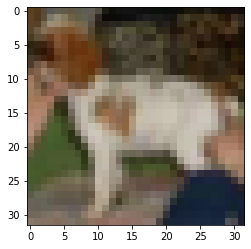

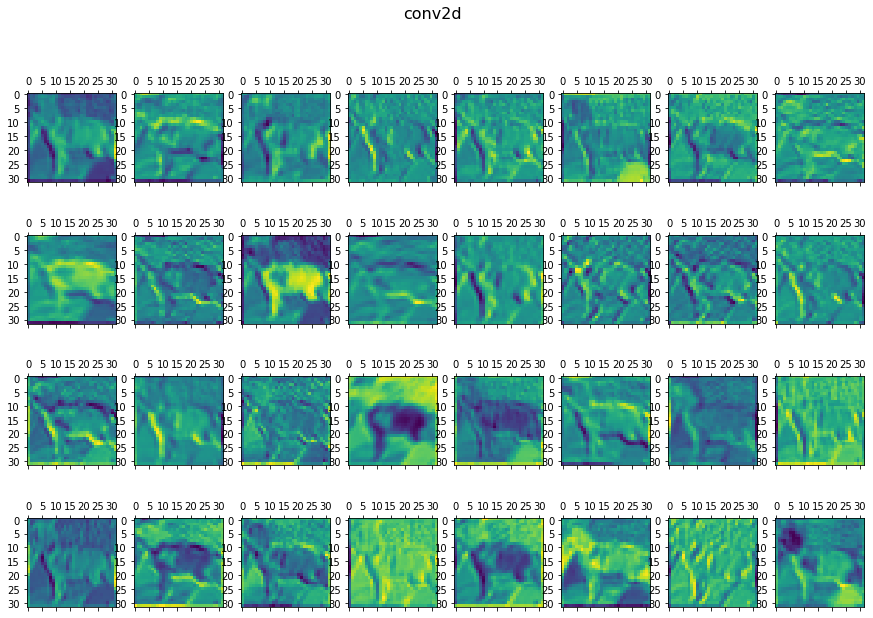

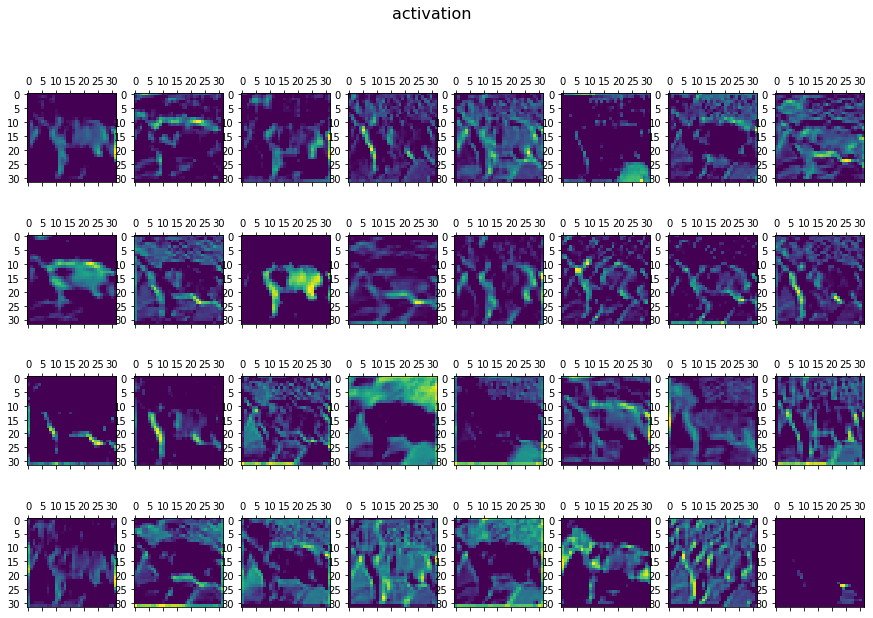

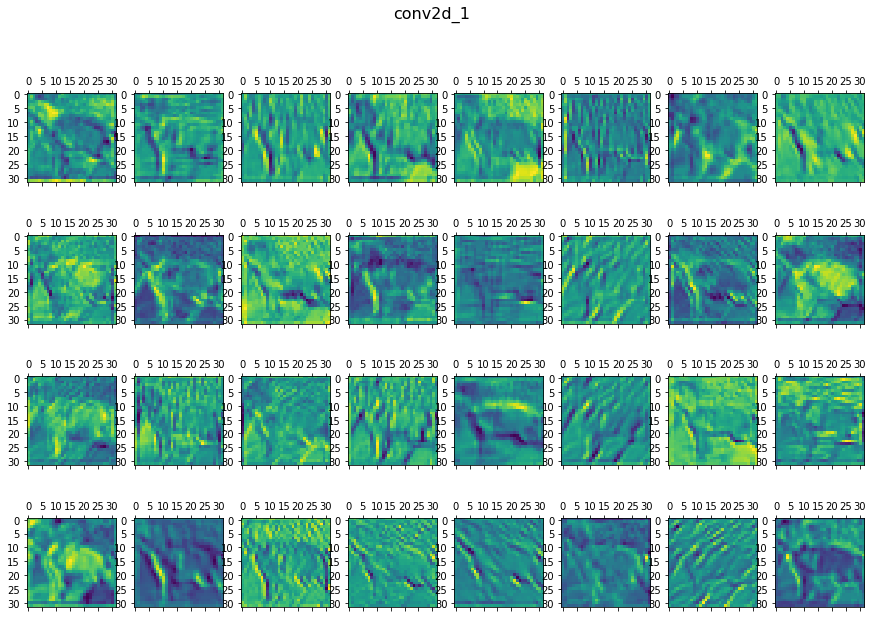

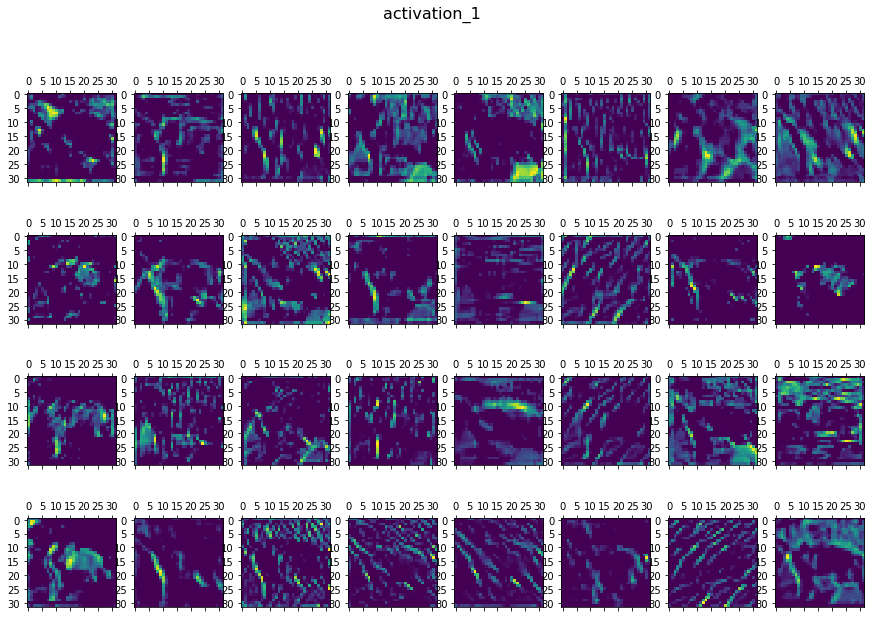

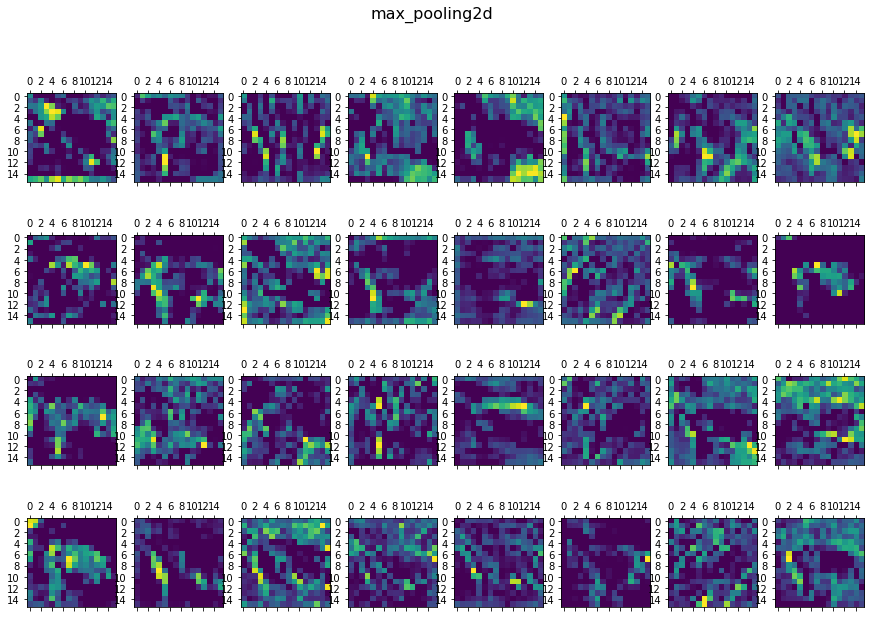

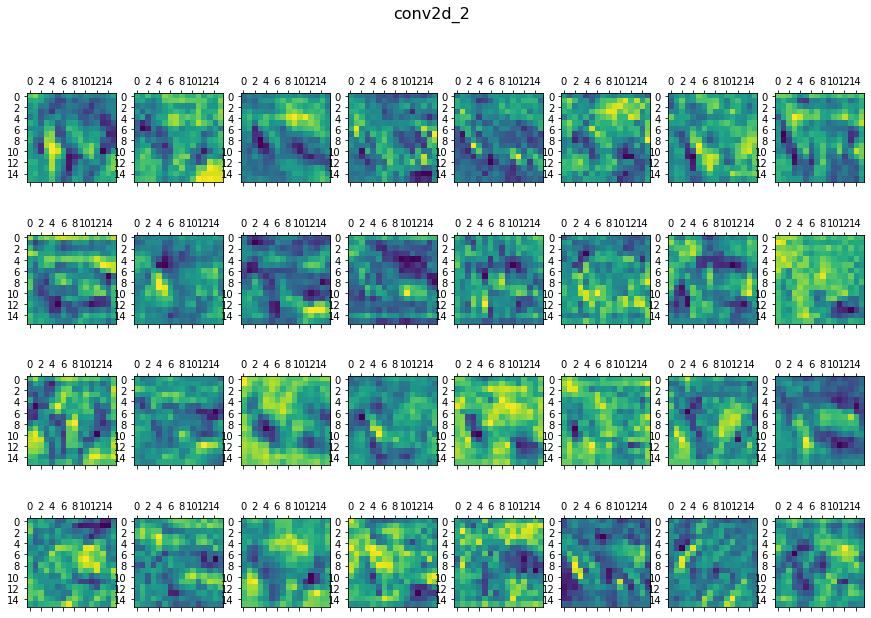

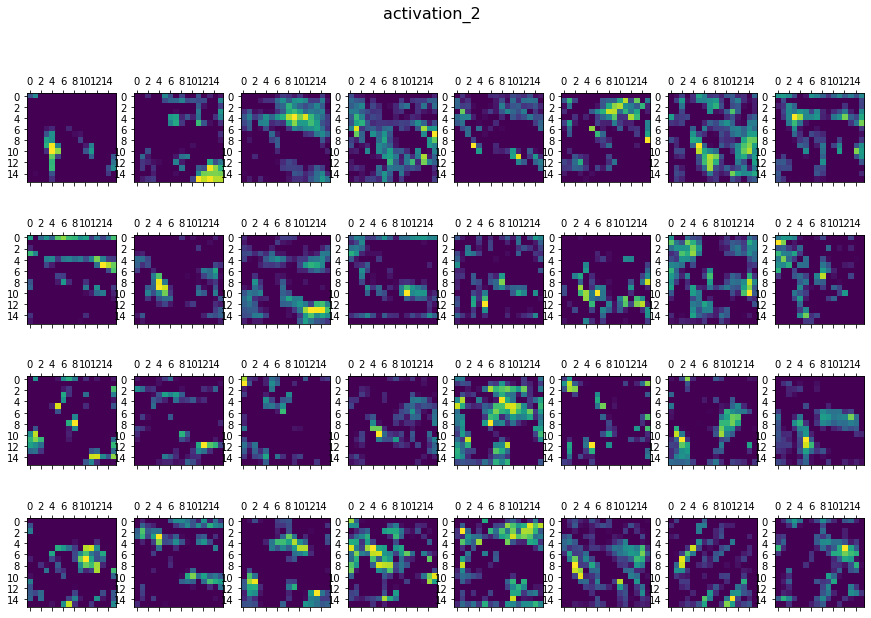

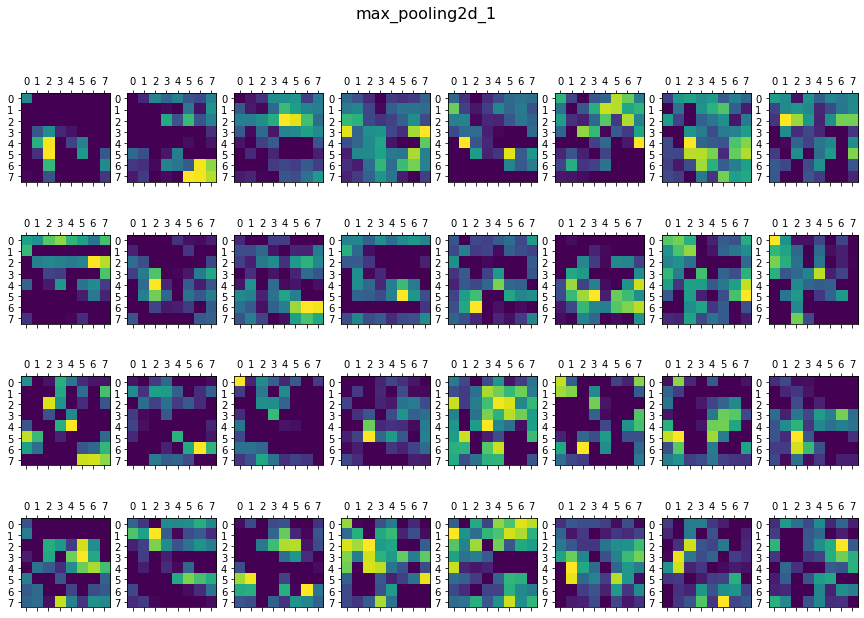

In [9]:
image_index = 12
plt.imshow(X_test[image_index])
for i in [0,2,3,5,6,7,9,10]:
    show_filters(cnn, i, X_test[image_index])